**BPI Challenge 2016_Clicks_Logged_IN_Event Log**\


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#!wget https://data.4tu.nl/ndownloader/files/23991596/BPI2016_Clicks_Logged_In.csv

In [2]:
logged_in_csv = pd.read_csv('https://data.4tu.nl/ndownloader/files/23991596/BPI2016_Clicks_Logged_In.csv', sep=';', parse_dates=['TIMESTAMP'],encoding='cp1252' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
logged_in_csv.head()

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503890,30-39,V,247,247,14805466,1690840,2015-09-01 19:35:06.707,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,3. Versturen gegevens,NaN,NaN,3. Send data,NaN
3,2063574,50-65,M,296,301,12710639,1632512,2015-11-06 10:47:42.137,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2185161,18-29,V,327,327,44281847,757955,2016-01-11 18:44:07.877,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/bijstan...,bijstandsuitkering,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
logged_in_csv.tail()

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
7174929,1524682,30-39,M,230,230,13731498,929774,2015-07-22 14:22:13.983,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,vacatures_bij_mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7174930,710204,40-49,M,296,293,21416869,968898,2015-09-08 14:08:38.753,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,vacatures_bij_mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7174931,1524682,30-39,M,230,230,13731498,929774,2015-07-22 13:48:17.177,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,vacatures_bij_mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7174932,1524682,30-39,M,230,230,5244342,929774,2015-07-17 13:13:44.037,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,vacatures_bij_mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7174933,2083694,40-49,M,230,230,30872472,774629,2015-09-29 16:04:12.370,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,vacatures_bij_mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
logged_in_csv.sample(frac=.25)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
384081,670287,30-39,V,327,321,10446945,750941,2015-10-19 09:08:06.483,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,vacatures_bij_mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440048,2087604,50-65,V,305,308,10718916,951941,2015-09-30 20:55:15.407,www.werk.nl,/werk_nl/werknemer/home,home,Logged Out,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4202119,2204435,50-65,V,305,308,50907911,2370783,2016-02-01 13:56:35.350,www.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3549592,2177634,50-65,M,327,321,38898827,1307747,2015-12-16 12:47:10.243,digid.werk.nl,/werk_nl/werknemer/eintake/inschrijven,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5706053,571154,50-65,M,305,305,48186808,670636,2016-02-07 09:55:44.130,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,vacatures_bij_mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974647,1631276,18-29,V,296,293,8398973,958064,2015-10-22 13:51:59.173,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5504355,717812,18-29,M,305,305,27129472,966325,2015-09-03 11:38:20.337,www.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4039297,1663470,18-29,V,257,261,30457802,776085,2015-08-17 09:56:17.943,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6341353,2133547,18-29,V,271,274,21241890,1722857,2015-11-03 18:17:59.967,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_cv,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
logged_in_csv.shape

(7174934, 20)

In [7]:
logged_in_csv.columns

Index(['CustomerID', 'AgeCategory', 'Gender', 'Office_U', 'Office_W',
       'SessionID', 'IPID', 'TIMESTAMP', 'VHOST', 'URL_FILE', 'PAGE_NAME',
       'REF_URL_category', 'page_load_error', 'page_action_detail', 'tip',
       'service_detail', 'xps_info', 'page_action_detail_EN',
       'service_detail_EN', 'tip_EN'],
      dtype='object')

In [8]:
logged_in_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7174934 entries, 0 to 7174933
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   CustomerID             int64         
 1   AgeCategory            object        
 2   Gender                 object        
 3   Office_U               int64         
 4   Office_W               int64         
 5   SessionID              int64         
 6   IPID                   int64         
 7   TIMESTAMP              datetime64[ns]
 8   VHOST                  object        
 9   URL_FILE               object        
 10  PAGE_NAME              object        
 11  REF_URL_category       object        
 12  page_load_error        int64         
 13  page_action_detail     object        
 14  tip                    object        
 15  service_detail         object        
 16  xps_info               object        
 17  page_action_detail_EN  object        
 18  service_detail_EN     

In [9]:
logged_in_csv.TIMESTAMP.min(),logged_in_csv.TIMESTAMP.max()

(Timestamp('2015-07-01 02:36:59.713000'),
 Timestamp('2016-02-29 00:59:58.923000'))

In [ ]:
logged_in_csv.isna().sum()

CustomerID                     0
AgeCategory                    0
Gender                         0
Office_U                       0
Office_W                       0
SessionID                      0
IPID                           0
TIMESTAMP                      0
VHOST                          0
URL_FILE                       0
PAGE_NAME                      0
REF_URL_category         6660835
page_load_error                0
page_action_detail       7163784
tip                      7169505
service_detail           6951883
xps_info                 7125951
page_action_detail_EN    7165812
service_detail_EN        6951883
tip_EN                   7169505
dtype: int64

In [12]:
logged_in_csv['TIMESTAMP']

0         2015-10-05 10:12:56
1         2015-09-30 15:14:35
2         2015-09-01 19:35:06
3         2015-11-06 10:47:42
4         2016-01-11 18:44:07
                  ...        
7174929   2015-07-22 14:22:13
7174930   2015-09-08 14:08:38
7174931   2015-07-22 13:48:17
7174932   2015-07-17 13:13:44
7174933   2015-09-29 16:04:12
Name: TIMESTAMP, Length: 7174934, dtype: datetime64[ns]

In [11]:
logged_in_csv['TIMESTAMP'] = pd.to_datetime(logged_in_csv['TIMESTAMP']).apply(lambda x: x.replace(microsecond=0))

In [13]:
#Simplify Even Log
logged_in_csv.drop(['Office_U','Office_W','SessionID','IPID','URL_FILE'], inplace=True, axis=1)

In [14]:
logged_in_csv.head(5)

,CustomerID,AgeCategory,Gender,TIMESTAMP,VHOST,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
0,2025826,50-65,V,2015-10-05 10:12:56,www.werk.nl,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025826,50-65,V,2015-09-30 15:14:35,www.werk.nl,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503890,30-39,V,2015-09-01 19:35:06,digid.werk.nl,aanvragen-tw,NaN,0,NaN,NaN,3. Versturen gegevens,NaN,NaN,3. Send data,NaN
3,2063574,50-65,M,2015-11-06 10:47:42,www.werk.nl,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2185161,18-29,V,2016-01-11 18:44:07,www.werk.nl,bijstandsuitkering,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#remove colmuns
logged_in_csv = logged_in_csv.iloc[:,0:6]
logged_in_csv 

,CustomerID,AgeCategory,Gender,TIMESTAMP,VHOST,PAGE_NAME
0,2025826,50-65,V,2015-10-05 10:12:56,www.werk.nl,50plus
1,2025826,50-65,V,2015-09-30 15:14:35,www.werk.nl,50plus
2,1503890,30-39,V,2015-09-01 19:35:06,digid.werk.nl,aanvragen-tw
3,2063574,50-65,M,2015-11-06 10:47:42,www.werk.nl,50plus
4,2185161,18-29,V,2016-01-11 18:44:07,www.werk.nl,bijstandsuitkering
...,...,...,...,...,...,...
7174929,1524682,30-39,M,2015-07-22 14:22:13,digid.werk.nl,vacatures_bij_mijn_cv
7174930,710204,40-49,M,2015-09-08 14:08:38,digid.werk.nl,vacatures_bij_mijn_cv
7174931,1524682,30-39,M,2015-07-22 13:48:17,digid.werk.nl,vacatures_bij_mijn_cv
7174932,1524682,30-39,M,2015-07-17 13:13:44,digid.werk.nl,vacatures_bij_mijn_cv


In [17]:
logged_in_csv.sort_values(by='TIMESTAMP')

,CustomerID,AgeCategory,Gender,TIMESTAMP,VHOST,PAGE_NAME
3271608,797444,50-65,M,2015-07-01 02:36:59,digid.werk.nl,mijn_berichten
5687809,797444,50-65,M,2015-07-01 02:37:13,digid.werk.nl,mijn_cv
6113803,797444,50-65,M,2015-07-01 02:37:21,digid.werk.nl,mijn_cv
6167539,797444,50-65,M,2015-07-01 02:38:42,digid.werk.nl,mijn_sollicitaties
6167542,797444,50-65,M,2015-07-01 02:39:26,digid.werk.nl,mijn_sollicitaties
...,...,...,...,...,...,...
5501507,2094324,50-65,M,2016-02-29 00:59:51,digid.werk.nl,mijn_agenda
5501253,2094324,50-65,M,2016-02-29 00:59:53,digid.werk.nl,mijn_agenda
5500906,2094324,50-65,M,2016-02-29 00:59:55,digid.werk.nl,mijn_agenda
5500908,2094324,50-65,M,2016-02-29 00:59:57,digid.werk.nl,mijn_agenda


In [18]:
logged_in_csv.isna().sum()

CustomerID     0
AgeCategory    0
Gender         0
TIMESTAMP      0
VHOST          0
PAGE_NAME      0
dtype: int64

In [19]:
logged_in_csv['CustomerID']

0          2025826
1          2025826
2          1503890
3          2063574
4          2185161
            ...   
7174929    1524682
7174930     710204
7174931    1524682
7174932    1524682
7174933    2083694
Name: CustomerID, Length: 7174934, dtype: int64

In [20]:
logged_in_csv['CustomerID'].nunique()

26647

In [21]:
pd.DataFrame(
    {
        'variable': logged_in_csv.columns, 
        'unique values': [logged_in_csv[col].nunique() for col in logged_in_csv.columns],
        'fraction': [round(logged_in_csv[col].nunique() / logged_in_csv.shape[0], 4) for col in logged_in_csv.columns], 
    }
).set_index('variable')

,unique values,fraction
variable,,
CustomerID,26647,0.0037
AgeCategory,4,0.0000
Gender,2,0.0000
TIMESTAMP,5138739,0.7162
VHOST,2,0.0000
PAGE_NAME,600,0.0001


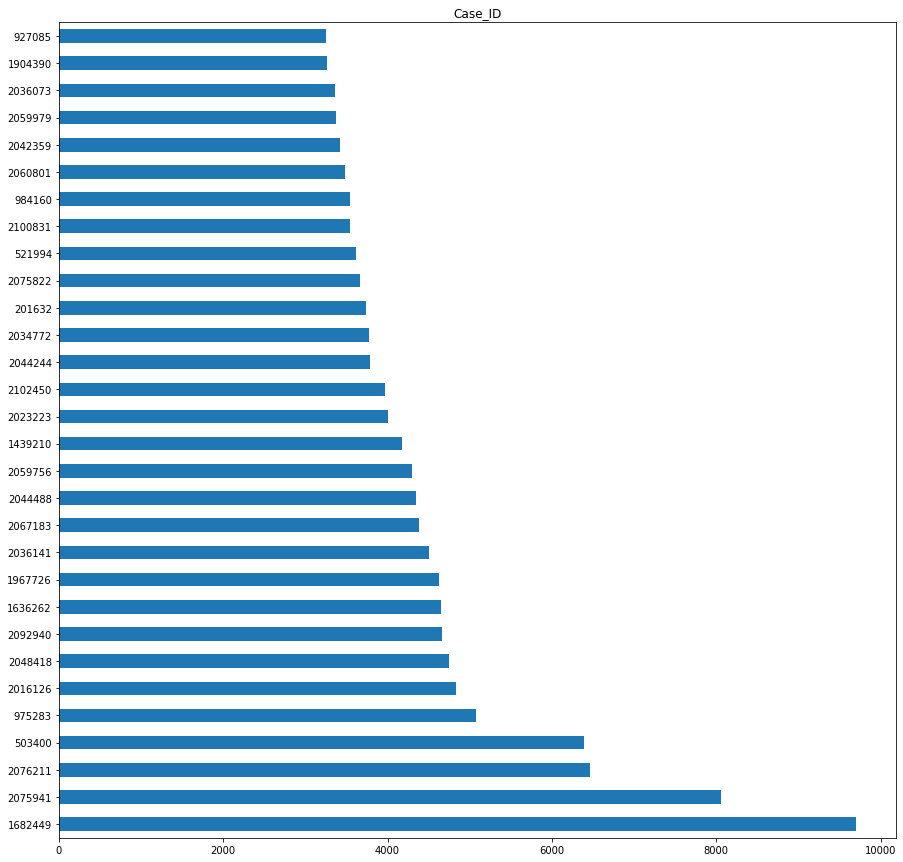

In [24]:
logged_in_csv.CustomerID.value_counts().head(30).plot(y='CustomerID', kind='barh', title='Case_ID',figsize=(15,15))
plt.show()

In [28]:
#Check a specific customer
Acustomer = logged_in_csv[logged_in_csv['CustomerID'] == 1682449].sort_values(by='TIMESTAMP')

In [30]:
Acustomer.PAGE_NAME.value_counts()

vacatures_bij_mijn_cv           5441
vacatures_zoeken                1785
home                            1072
mijn_cv                          758
taken                            147
mijn_berichten                   117
mijn_sollicitaties                97
zoekAantalIndicatief              73
inschrijven                       32
aanvragen-ww                      31
zoekBeroep                        20
mijn_werkmap                      18
mijn_tips                         16
mijn_documenten                   12
werkmap                            9
mijn_rechten_en_plichten           7
foutopgetreden.html                7
vragenlijst-uwv                    5
addVacatureToGereageerd            5
wijziging_doorgeven                4
uwvsanlig-webfont.woff             4
netwerken                          4
Portal (ignore_request_page)       3
mijn_online_trainingen             3
ww                                 2
regio                              2
document                           2
t

In [36]:
def Activity_duration(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str, 
    duration: str ='h'
) -> pd.DataFrame:
    
    
    data = dict()
    groups = Acustomer.groupby(case_var)
    for group in groups:
        arc = group[1].sort_values(timestamp_var)\
        .rename(columns = {event_var:'event_from', timestamp_var:'time_from'})
        arc['event_to'] = arc['event_from'].shift(-1)
        arc['time_to'] = arc['time_from'].shift(-1)
        arc.dropna(inplace = True)
        duration_var = f'duration ({duration})'
        arc[duration_var] = (arc['time_to'] - arc['time_from']) / np.timedelta64(1, duration)
        data[group[0]] = arc[[case_var, 'event_from', 'event_to', 'time_from', 'time_to', duration_var]]
    return pd.concat(data.values()).set_index(case_var)

In [37]:
Acustomer_Duration = Activity_duration(Acustomer, 'CustomerID', 'PAGE_NAME', 'TIMESTAMP')
Acustomer_Duration

,event_from,event_to,time_from,time_to,duration (h)
CustomerID,,,,,
1682449,home,mijn_cv,2015-07-01 06:03:07,2015-07-01 06:03:30,0.006389
1682449,mijn_cv,vacatures_bij_mijn_cv,2015-07-01 06:03:30,2015-07-01 06:03:42,0.003333
1682449,vacatures_bij_mijn_cv,vacatures_bij_mijn_cv,2015-07-01 06:03:42,2015-07-01 06:03:52,0.002778
1682449,vacatures_bij_mijn_cv,vacatures_bij_mijn_cv,2015-07-01 06:03:52,2015-07-01 06:04:26,0.009444
1682449,vacatures_bij_mijn_cv,vacatures_bij_mijn_cv,2015-07-01 06:04:26,2015-07-01 06:04:44,0.005000
...,...,...,...,...,...
1682449,vacatures_bij_mijn_cv,vacatures_bij_mijn_cv,2016-02-28 08:07:23,2016-02-28 08:07:34,0.003056
1682449,vacatures_bij_mijn_cv,vacatures_bij_mijn_cv,2016-02-28 08:07:34,2016-02-28 08:07:46,0.003333
1682449,vacatures_bij_mijn_cv,vacatures_bij_mijn_cv,2016-02-28 08:07:46,2016-02-28 08:08:08,0.006111


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


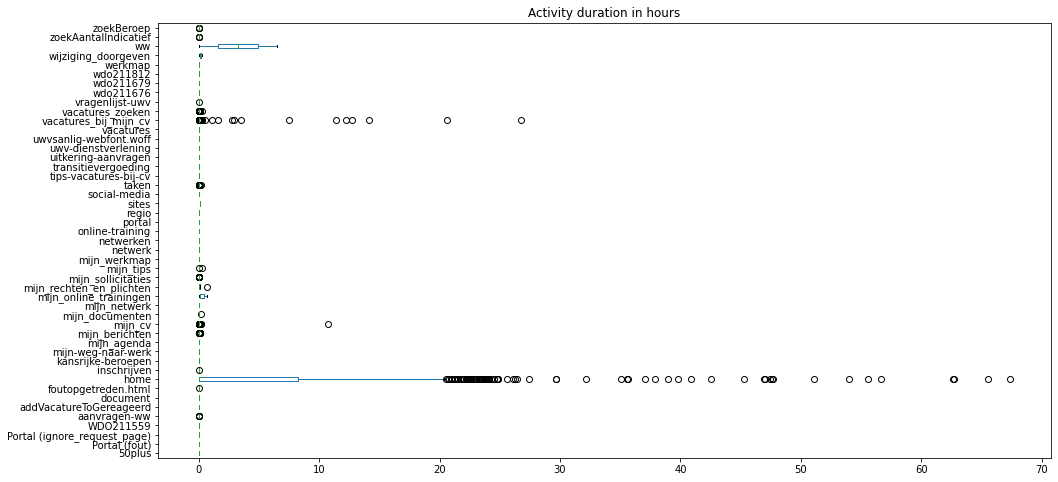

In [39]:
Acustomer_Duration\
.loc[:, ['event_from', 'event_to', 'duration (h)']]\
.reset_index()\
.pivot(columns='event_from', values='duration (h)')\
.plot(kind='box', vert=False, title='Activity duration in hours',figsize = (16,8))
plt.show()

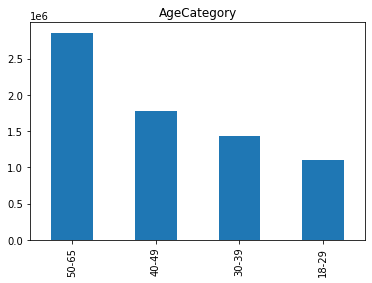

In [40]:
logged_in_csv.AgeCategory.value_counts().plot(y='AgeCategory', kind='bar', title='AgeCategory')
plt.show()

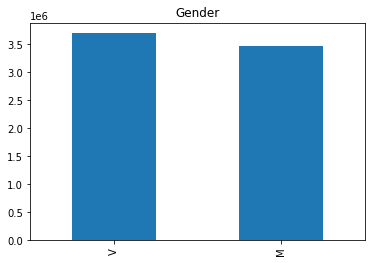

In [41]:
logged_in_csv.Gender.value_counts().plot(y='Gender', kind='bar', title='Gender')
plt.show()

In [42]:
print("Percentage age range 50-65: {:.2f}".format(sum(logged_in_csv.AgeCategory == '50-65')/len(logged_in_csv)*100))
print("Percentage age range 40-49 {:.2f}".format(sum(logged_in_csv.AgeCategory == '40-49')/len(logged_in_csv)*100))
print("Percentage age range 30-39: {:.2f}".format(sum(logged_in_csv.AgeCategory == '30-39')/len(logged_in_csv)*100))
print("Percentage age range 18-29: {:.2f}".format(sum(logged_in_csv.AgeCategory == '18-29')/len(logged_in_csv)*100))

Percentage age range 50-65: 39.81
Percentage age range 40-49 24.81
Percentage age range 30-39: 19.96
Percentage age range 18-29: 15.42


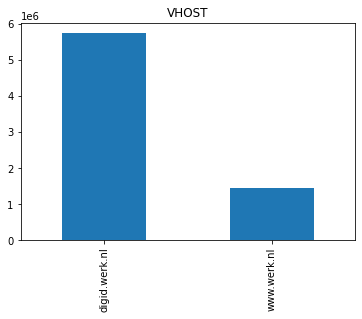

In [43]:
logged_in_csv.VHOST.value_counts().plot(y='VHOST', kind='bar', title='VHOST')
plt.show()

In [48]:
logged_in_csv.PAGE_NAME.value_counts(normalize=True)*100

taken                    25.410338
vacatures_bij_mijn_cv    13.295857
mijn_cv                  12.273242
home                      8.133106
vacatures_zoeken          8.120563
                           ...    
opzegverbod               0.000014
verkoop                   0.000014
horeca                    0.000014
tsjechie                  0.000014
aanmelden-bij-werk.nl     0.000014
Name: PAGE_NAME, Length: 600, dtype: float64

In [45]:
logged_in_csv.PAGE_NAME.value_counts().head(5)

taken                    1823175
vacatures_bij_mijn_cv     953969
mijn_cv                   880597
home                      583545
vacatures_zoeken          582645
Name: PAGE_NAME, dtype: int64

In [59]:
#Reduce PAGE_NAME variety
logged_in_csv1 = logged_in_csv[logged_in_csv['PAGE_NAME'].map(logged_in_csv['PAGE_NAME'].value_counts(normalize=True)*100) > 5]
logged_in_csv1.shape

(5353242, 6)

In [60]:
logged_in_csv1.PAGE_NAME.value_counts(sort=True)

taken                    1823175
vacatures_bij_mijn_cv     953969
mijn_cv                   880597
home                      583545
vacatures_zoeken          582645
mijn_berichten            529311
Name: PAGE_NAME, dtype: int64

In [61]:
#Calculate losing Data
(logged_in_csv.shape[0]-logged_in_csv1.shape[0])/logged_in_csv.shape[0]*100

25.38966908963901

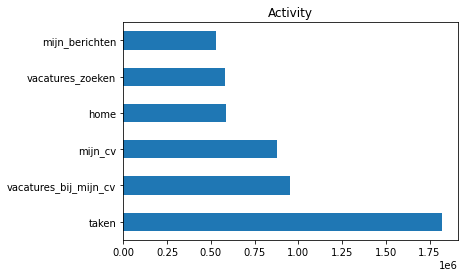

In [62]:
logged_in_csv1.PAGE_NAME.value_counts().plot(y='PAGE_NAME', kind='barh', title='Activity')
plt.show()

In [66]:
logged_in_csv.TIMESTAMP.nunique()

5138739

In [65]:
logged_in_csv1.TIMESTAMP.nunique()

4128774

In [67]:
logged_in_csv.PAGE_NAME.nunique()

600

In [64]:
 logged_in_csv1.PAGE_NAME.nunique()

6

In [70]:
# Multiple occurences: timestamp
logged_in_csv.TIMESTAMP.value_counts()[logged_in_csv.TIMESTAMP.value_counts() > 1]

2016-02-24 15:15:07    10
2016-01-11 13:53:44    10
2016-01-05 14:05:15    10
2016-01-25 10:52:10    10
2016-01-18 12:08:50    10
                       ..
2015-10-31 11:27:35     2
2016-01-05 09:38:24     2
2015-12-15 19:40:22     2
2016-02-01 20:40:10     2
2015-09-01 12:08:38     2
Name: TIMESTAMP, Length: 1499743, dtype: int64

In [73]:
def activity_duration(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str, 
    duration: str ='h'
) -> pd.DataFrame:
    
    
    data = dict()
    groups = logged_in_csv1.groupby(case_var)
    for group in groups:
        arc = group[1].sort_values(timestamp_var)\
        .rename(columns = {event_var:'event_from', timestamp_var:'time_from'})
        arc['event_to'] = arc['event_from'].shift(-1)
        arc['time_to'] = arc['time_from'].shift(-1)
        arc.dropna(inplace = True)
        duration_var = f'duration ({duration})'
        arc[duration_var] = (arc['time_to'] - arc['time_from']) / np.timedelta64(1, duration)
        data[group[0]] = arc[[case_var, 'event_from', 'event_to', 'time_from', 'time_to', duration_var]]
    return pd.concat(data.values()).set_index(case_var)

In [74]:
logged_in_csv1_Duration = activity_duration(logged_in_csv1, 'CustomerID', 'PAGE_NAME', 'TIMESTAMP')
logged_in_csv1_Duration

,event_from,event_to,time_from,time_to,duration (h)
CustomerID,,,,,
220,mijn_berichten,mijn_berichten,2015-12-07 10:08:14,2015-12-07 10:09:07,0.014722
220,mijn_berichten,taken,2015-12-07 10:09:07,2015-12-07 10:10:44,0.026944
220,taken,vacatures_zoeken,2015-12-07 10:10:44,2015-12-07 10:12:27,0.028611
220,vacatures_zoeken,mijn_berichten,2015-12-07 10:12:27,2015-12-07 10:12:33,0.001667
220,mijn_berichten,mijn_cv,2015-12-07 10:12:33,2015-12-07 10:12:51,0.005000
...,...,...,...,...,...
2240448,mijn_berichten,taken,2016-02-28 13:27:01,2016-02-28 13:27:17,0.004444
2240448,taken,taken,2016-02-28 13:27:17,2016-02-28 13:27:33,0.004444
2240448,taken,taken,2016-02-28 13:27:33,2016-02-28 13:27:53,0.005556


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


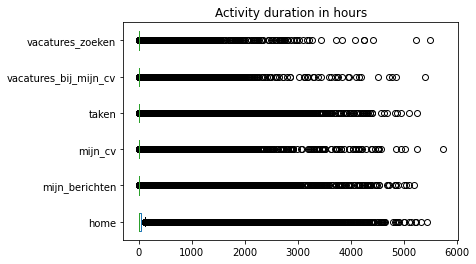

In [75]:
logged_in_csv1_Duration\
.loc[:, ['event_from', 'event_to', 'duration (h)']]\
.reset_index()\
.pivot(columns='event_from', values='duration (h)')\
.plot(kind='box', vert=False, title='Activity duration in hours')
plt.show()

In [ ]:
#df[(df['dt'] > '2014-07-23 07:30:00') & (df['dt'] < '2014-07-23 09:00:00')]

In [80]:
#Sampling for better EDA
SampleLog = logged_in_csv1[(logged_in_csv1['TIMESTAMP'] > '2015-07-01 02:36:59') & (logged_in_csv1['TIMESTAMP'] < '2015-07-14 02:36:59')]
SampleLog.shape

(84654, 6)

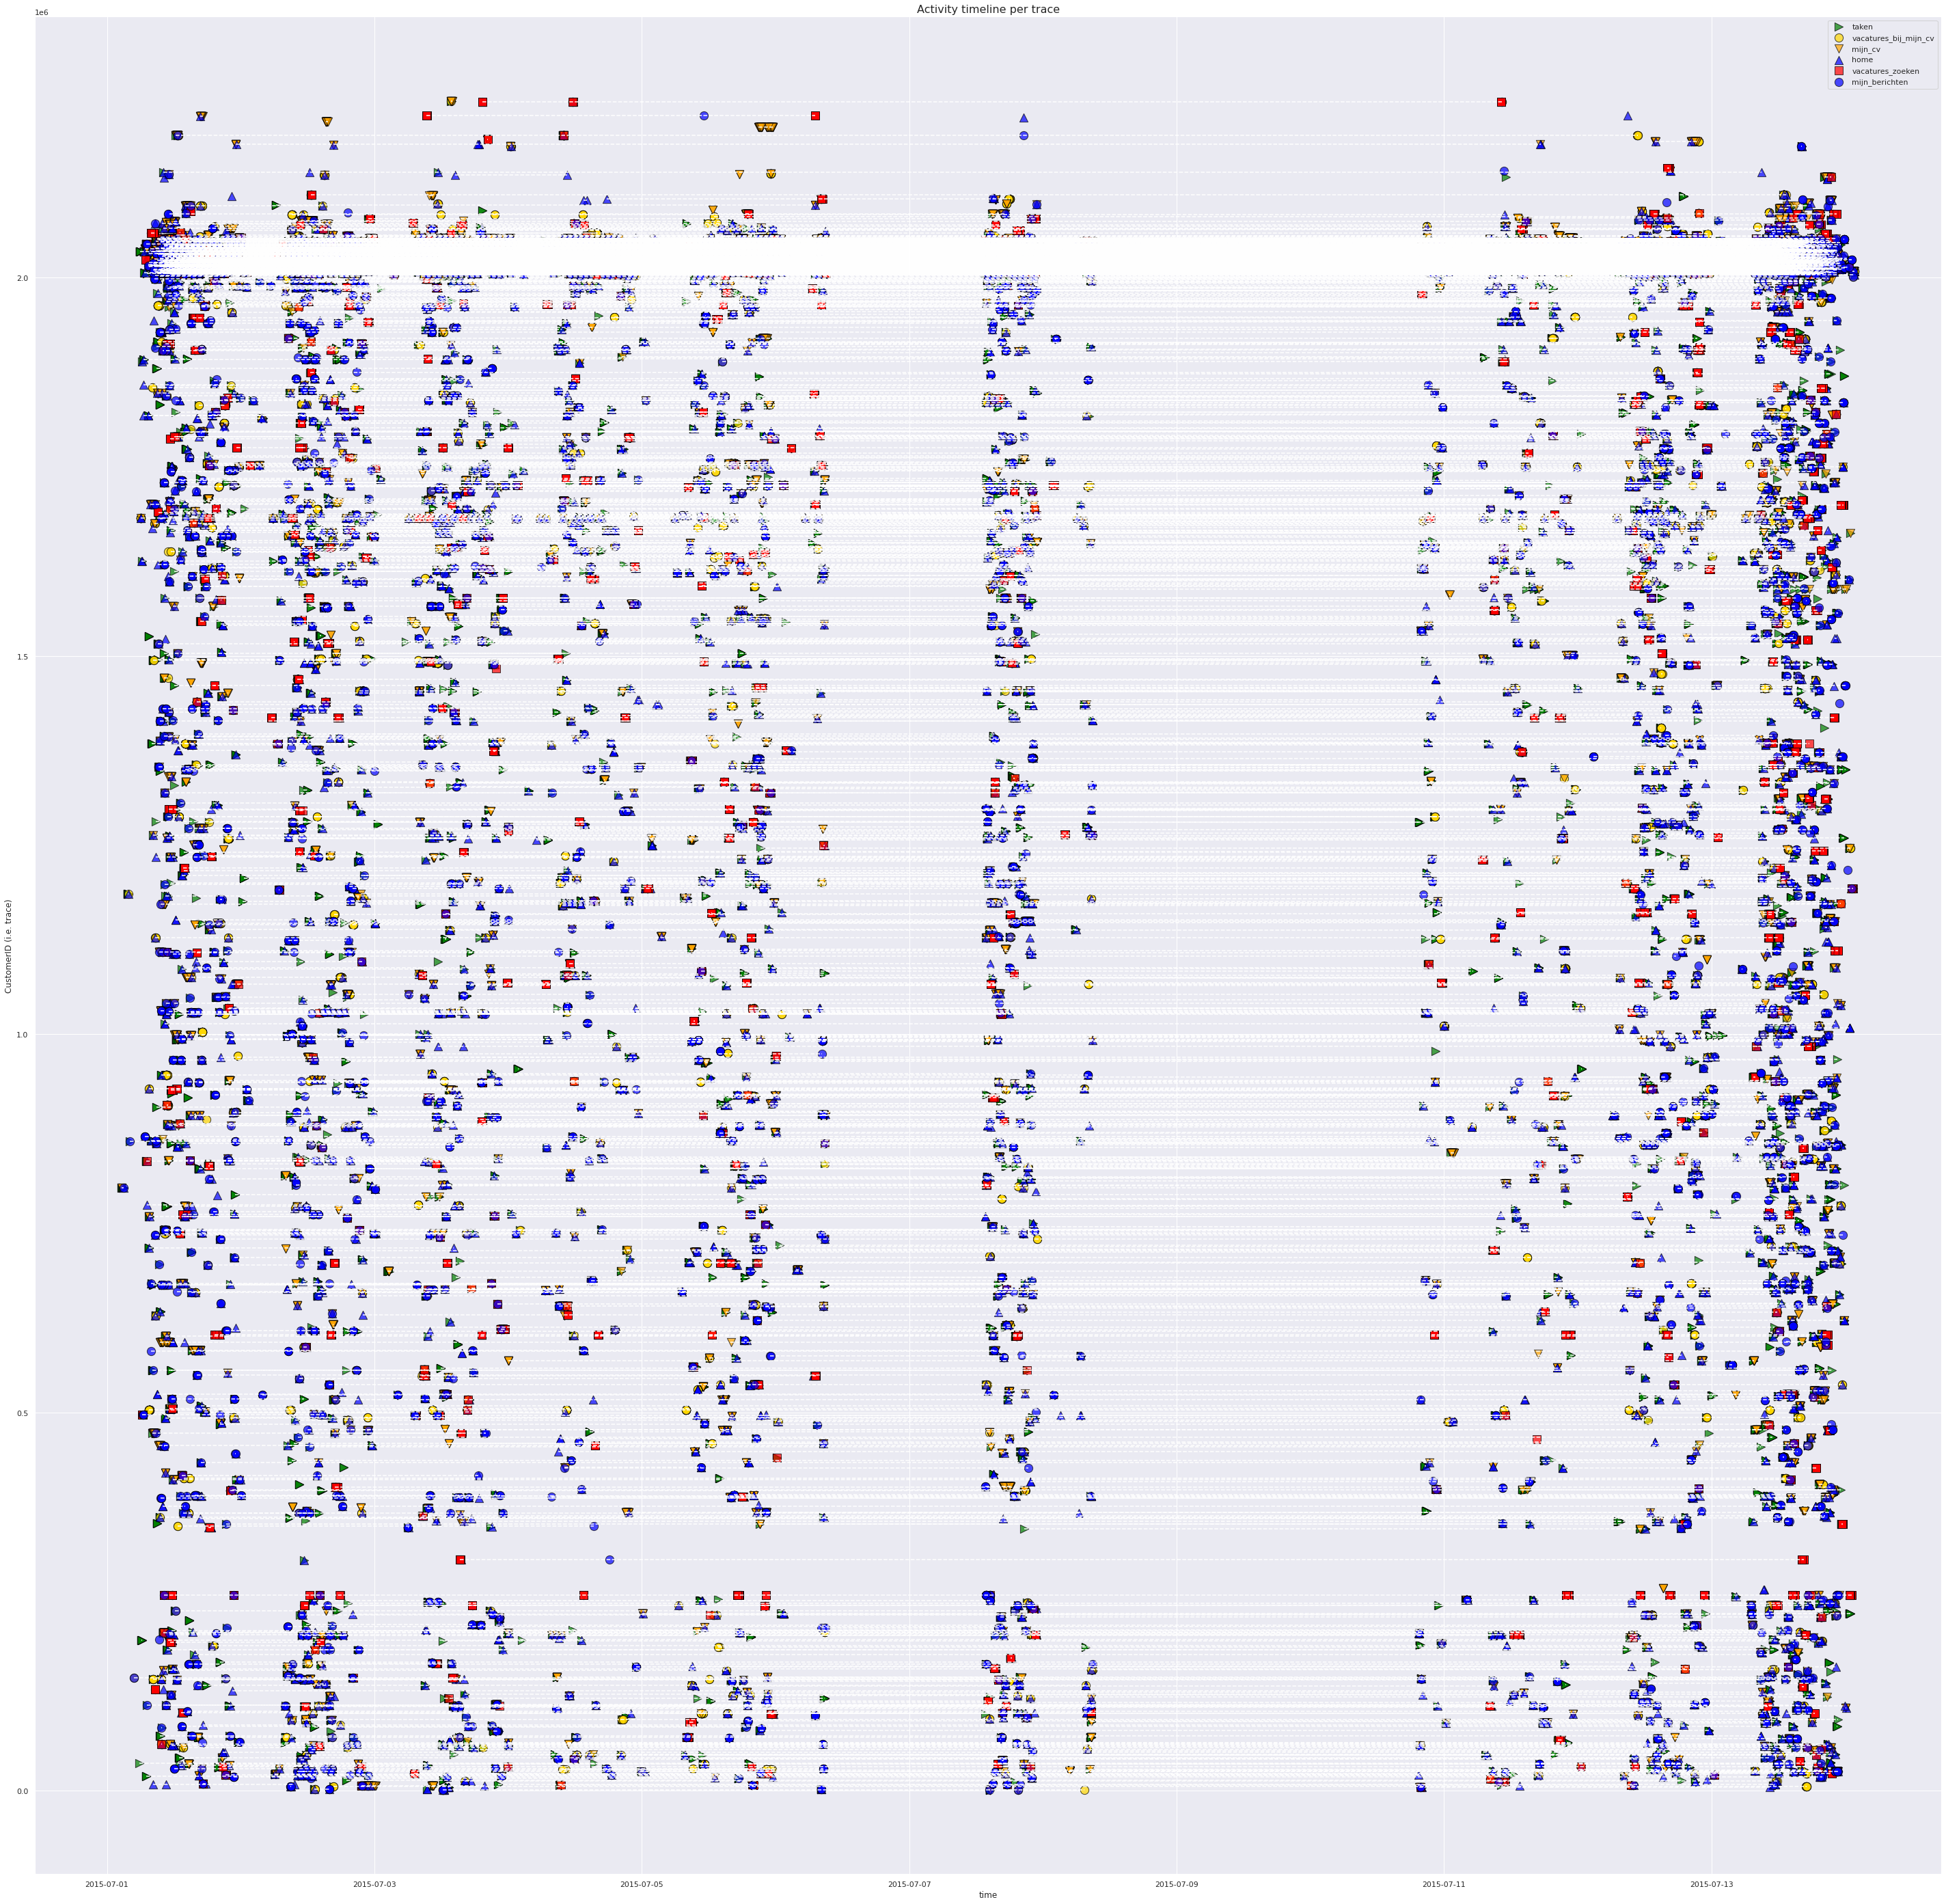

In [82]:
activity = {
    'taken': ('>', 'green'), 
    'vacatures_bij_mijn_cv': ('o', 'gold'), 
    'mijn_cv': ('v', 'orange'), 
    'home': ('^', 'blue'), 
    'vacatures_zoeken': ('s', 'red'), 
    'mijn_berichten' : ('o', 'blue'),

}    
# Figure
fig, ax = plt.subplots(figsize=(50, 50))

# Timelines
for timeline in SampleLog.groupby('CustomerID').agg(time_start = ('TIMESTAMP', min), 
                                               time_end = ('TIMESTAMP', max)
                                              ).reset_index().itertuples(index=False):
    plt.hlines(timeline.CustomerID, timeline.time_start, timeline.time_end, 
               colors = 'white', linestyles = 'dashed')

# Activities
for act in activity.keys():
    ax.scatter(SampleLog.loc[SampleLog.PAGE_NAME == act, 'TIMESTAMP'], 
               SampleLog.loc[SampleLog.PAGE_NAME == act, 'CustomerID'],
               marker =  activity[act][0],
               c =    activity[act][1], 
               s = 150, 
               alpha = .7,
               label = act,
               edgecolors = 'black',
              )
    
ax.set_title('Activity timeline per trace', fontsize=16)
ax.set_xlabel('time')
ax.set_ylabel('CustomerID (i.e. trace)')
ax.legend()
ax.grid(True)

In [78]:
def dfg_frequency_matrix(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str
) -> pd.DataFrame:
    
    """
    Return a directly-follows graph frequency matrix based on the traces in the event log.
    Row events (i.e. the index) are events 'from' and column events are the events 'to'.
    """
    
    # event log
    log = event_log[[case_var, event_var, timestamp_var]]
    
    # initiate matrix
    events = log[event_var].unique()
    matrix = pd.DataFrame(columns=events, index=events).fillna(0)
    
    # groupby case_var
    groups = log.groupby(case_var)
    
    # loop through case groups
    for group in groups:
        event = group[1].sort_values(timestamp_var)\
        .drop([case_var, timestamp_var], axis = 1)\
        .rename(columns = {event_var:'event_from'})
        event['event_to'] = event['event_from'].shift(-1)
        event.dropna(inplace = True)
        
        # loop through traces
        for trace in event.itertuples(index = False):
            matrix.at[trace.event_from, trace.event_to] += 1
                
    return matrix.replace(0, np.nan)

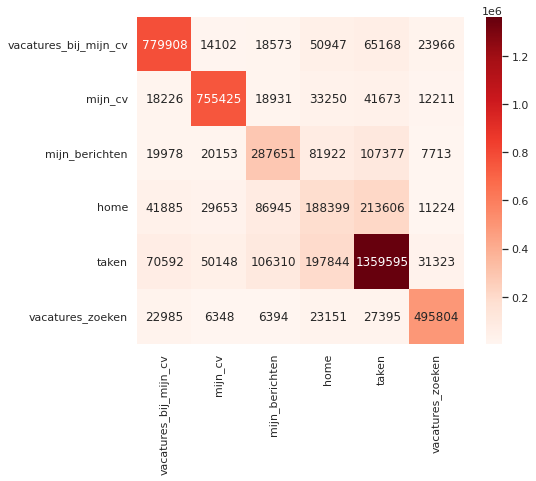

In [79]:
# Directly-Follows Graph frequency heatmap
dfg_freq_matrix = dfg_frequency_matrix(logged_in_csv1, 'CustomerID', 'PAGE_NAME', 'TIMESTAMP')
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(dfg_freq_matrix, annot=True, fmt='.0f', cmap='Reds', square=True)
plt.show()

In [ ]:
def dfg_performance_matrix(
    event_log: pd.DataFrame, 
    case_var: str, 
    event_var: str, 
    timestamp_var: str, 
    duration: str ='h'
) -> pd.DataFrame:
    
    """
    Return a directly-follows graph duration matrix based on the traces in the event log.
    Row events (i.e. the index) are events 'from' and column events are the events 'to'.
    By default duration is set to hours (h). Use 's' for seconds, 'D' for days and 'W' for weeks.
    """
    
    # event log
    log = event_log[[case_var, event_var, timestamp_var]]
    
    # initiate matrix
    events = log[event_var].unique()
    matrix = pd.DataFrame(columns=events, index=events)
    
    # groupby case_var
    groups = log.groupby(case_var)
    
    # loop through case groups
    for group in groups:
        event = group[1].sort_values(timestamp_var)\
        .rename(columns = {event_var:'event_from', timestamp_var:'time_begin'})
        event['event_to'] = event['event_from'].shift(-1)
        event['time_end'] = event['time_begin'].shift(-1)
        event['duration'] = (event['time_end'] - event['time_begin']) / np.timedelta64(1, duration)
        event.dropna(inplace = True)
        
        # loop through traces
        for row in event.itertuples(index = False):
            matrix.at[row.event_from, row.event_to] = \
            np.nansum([matrix.at[row.event_from, row.event_to], row.duration])
    
    return matrix.astype(float)

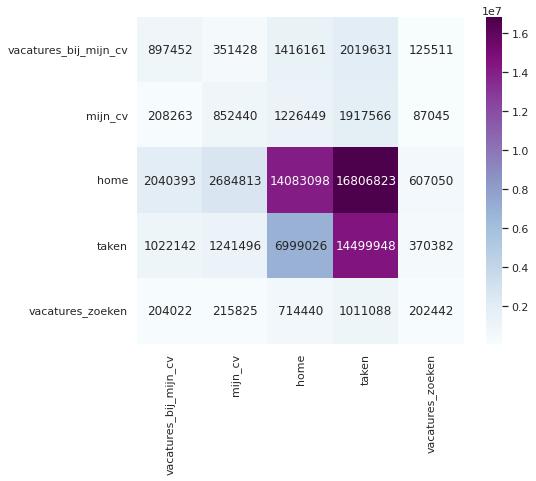

In [ ]:
# Directly-Follows Graph total duration heapmap (in hours)
dfg_perf_matrix = dfg_performance_matrix(logged_in_csv1, 'CustomerID', 'PAGE_NAME', 'TIMESTAMP')
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(dfg_perf_matrix, annot=True, fmt='.0f', cmap='BuPu', square=True)
plt.show()

In [ ]:
def dfg_frequency_table(dfg_frequency_matrix: pd.DataFrame) -> pd.DataFrame:
    
    """
    Returns an directly-follows graph frequency table
    """
    
    arcs = list()
    
    for row in dfg_frequency_matrix.index:
        for col in dfg_frequency_matrix.columns:
            if not np.isnan(dfg_frequency_matrix.at[row, col]):
                arcs.append((row, col, dfg_frequency_matrix.at[row, col]))
    
    arc_freq = pd.DataFrame(arcs, columns = ['event_from', 'event_to', 'frequency'])\
    .set_index(['event_from', 'event_to'])
    
    return arc_freq

In [ ]:
# Directly-Follows Graph frequency and performance (in hours) table
df = pd.merge(
    dfg_frequency_table(
        dfg_frequency_matrix(logged_in_csv1, 'CustomerID', 'PAGE_NAME', 'TIMESTAMP'))\
    .reset_index(),
    activity_duration(logged_in_csv1, 'CustomerID', 'PAGE_NAME', 'TIMESTAMP')\
    .loc[:, ['event_from', 'event_to', 'duration (h)']]\
    .groupby(by = ['event_from', 'event_to']).mean('duration (h)')\
    .reset_index(),
    left_on = ['event_from', 'event_to'],
    right_on = ['event_from', 'event_to']
).rename(columns = {'duration (h)':'average_duration'})

df['average_duration'] = df['average_duration'].apply(lambda x: np.round(x, decimals=2))
df['frequency'] = df['frequency'].astype(int)
df['total_duration'] = df['frequency'] * df['average_duration']

df.sort_values(['total_duration', 'average_duration', 'frequency'], ascending=False)

,event_from,event_to,frequency,average_duration,total_duration
12,home,home,223126,53.23,11876996.98
13,home,taken,250600,45.03,11284518.00
18,taken,taken,1410290,3.72,5246278.80
17,taken,home,231943,21.70,5033163.10
11,home,mijn_cv,35313,50.59,1786484.67
10,home,vacatures_bij_mijn_cv,47781,24.32,1162033.92
2,vacatures_bij_mijn_cv,home,56225,19.58,1100885.50
3,vacatures_bij_mijn_cv,taken,72473,14.67,1063178.91
8,mijn_cv,taken,49449,17.25,852995.25
7,mijn_cv,home,38177,18.75,715818.75
